# 최종 데이터 파일 만들기

* 분석에 필요한 최종 데이터 프레임 만들기

In [1]:
import pandas as pd
import numpy as np

## 1) 업종-지역별 배달 주문 건수

In [4]:
## 데이터 불러오기 및 컬럼 설정

raw_data = pd.read_csv('../data/업종-지역별 배달 주문건수.csv', encoding='utf-8', header=None)
raw_data.columns = ['날짜', '시간대별 시간', '업종명', '광역시도명', '시군구명', '주문건수']
raw_data

,날짜,시간대별 시간,업종명,광역시도명,시군구명,주문건수
0,2019-07-17,0,도시락,경기도,의정부시,1
1,2019-07-17,0,돈까스/일식,경기도,의정부시,3
2,2019-07-17,0,돈까스/일식,충청북도,제천시,1
3,2019-07-17,0,배달전문업체,경기도,고양시 일산동구,8
4,2019-07-17,0,배달전문업체,경기도,의정부시,3
...,...,...,...,...,...,...
1957310,2020-09-30,23,회,경기도,화성시,2
1957311,2020-09-30,23,회,서울특별시,도봉구,1
1957312,2020-09-30,23,회,서울특별시,은평구,7
1957313,2020-09-30,23,회,전라북도,군산시,1


In [9]:
## 서울특별시 / 경기도만 추출

sg_data = raw_data.loc[(raw_data['광역시도명'] == '경기도') | (raw_data['광역시도명'] == '서울특별시')].reset_index(drop=True)

In [110]:
## 종속변수 완성
grouped_sg = sg_data.groupby(['광역시도명', '날짜', '업종명']).sum()[['주문건수']].reset_index()



In [113]:
grouped_sg.loc[grouped_sg['광역시도명']=='서울특별시', '광역시도명'] = '서울'

In [114]:
grouped_sg

,광역시도명,날짜,업종명,주문건수
0,경기도,2019-07-17,도시락,96
1,경기도,2019-07-17,돈까스/일식,198
2,경기도,2019-07-17,배달전문업체,108
3,경기도,2019-07-17,분식,554
4,경기도,2019-07-17,심부름,4
...,...,...,...,...
13816,서울,2020-09-30,카페/디저트,167
13817,서울,2020-09-30,패스트푸드,916
13818,서울,2020-09-30,피자,130
13819,서울,2020-09-30,한식,282


In [100]:
import matplotlib.pyplot as plt


tt = temp.loc[(temp['업종명']=='치킨')&(temp['광역시도명']=='서울특별시')][['날짜', '주문건수']]

tt['날짜'] = pd.to_datetime(tt['날짜'], format='%Y-%m-%d').sort_values()



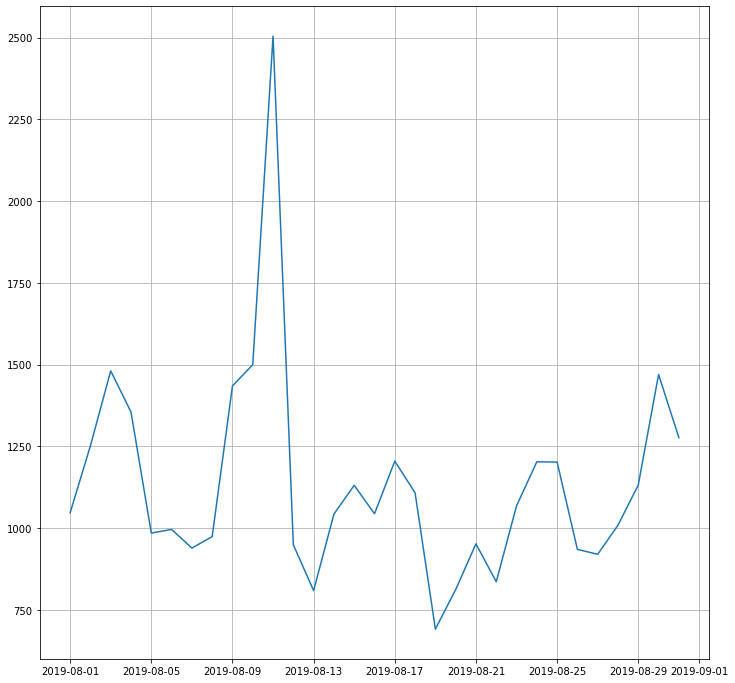

In [102]:
plt.figure(figsize=(12, 12))

plt.plot(tt.loc[(tt['날짜'].dt.year == 2019) & (tt['날짜'].dt.month == 8)]['날짜'], tt.loc[(tt['날짜'].dt.year == 2019) & (tt['날짜'].dt.month == 8)]['주문건수'])
plt.grid()

## 2) 서울시 기상데이터

In [116]:
weather = pd.read_csv('../data/가공/기상데이터.csv', encoding='utf-8', index_col=0)
weather

,지점명,일시,기온(°C),풍속(m/s),습도(%),증기압(hPa),지면온도(°C)
0,경기도,2019-07-17,24.986,0.948,82.192,25.548,27.070
1,경기도,2019-07-18,26.353,1.113,74.533,24.797,29.028
2,경기도,2019-07-19,27.125,1.610,75.275,26.231,29.912
3,경기도,2019-07-20,27.493,2.658,74.483,27.056,27.423
4,경기도,2019-07-21,25.050,1.708,91.883,29.000,26.243
...,...,...,...,...,...,...,...
879,서울,2020-09-26,19.342,2.475,62.333,13.688,20.462
880,서울,2020-09-27,20.208,2.096,62.917,14.563,21.746
881,서울,2020-09-28,20.592,1.879,65.667,15.479,22.046
882,서울,2020-09-29,19.646,1.883,67.667,15.125,21.188


In [118]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 883
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점명       884 non-null    object 
 1   일시        884 non-null    object 
 2   기온(°C)    884 non-null    float64
 3   풍속(m/s)   884 non-null    float64
 4   습도(%)     884 non-null    float64
 5   증기압(hPa)  884 non-null    float64
 6   지면온도(°C)  884 non-null    float64
dtypes: float64(5), object(2)
memory usage: 55.2+ KB


In [127]:
sg_weather = pd.merge(grouped_sg, weather, left_on=['광역시도명', '날짜'], right_on=['지점명', '일시'], how='inner')

sg_weather.drop(['지점명', '일시'], axis=1, inplace=True)

In [129]:
sg_weather

,광역시도명,날짜,업종명,주문건수,기온(°C),풍속(m/s),습도(%),증기압(hPa),지면온도(°C)
0,경기도,2019-07-17,도시락,96,24.986,0.948,82.192,25.548,27.07
1,경기도,2019-07-17,돈까스/일식,198,24.986,0.948,82.192,25.548,27.07
2,경기도,2019-07-17,배달전문업체,108,24.986,0.948,82.192,25.548,27.07
3,경기도,2019-07-17,분식,554,24.986,0.948,82.192,25.548,27.07
4,경기도,2019-07-17,심부름,4,24.986,0.948,82.192,25.548,27.07
...,...,...,...,...,...,...,...,...,...
13816,서울,2020-09-30,카페/디저트,167,18.800,1.700,77.000,16.600,17.50
13817,서울,2020-09-30,패스트푸드,916,18.800,1.700,77.000,16.600,17.50
13818,서울,2020-09-30,피자,130,18.800,1.700,77.000,16.600,17.50
13819,서울,2020-09-30,한식,282,18.800,1.700,77.000,16.600,17.50


## 3) 서울시 미세먼지

In [137]:
pollution = pd.read_csv('../data/가공/지역별미세먼지데이터.csv', encoding='utf-8').iloc[:, 1:]
pollution


,측정날짜,행정구역,SO2,CO,O3,NO2,PM10,PM25
0,20190701,강원,0.002,0.405,0.052,0.008,40.010,26.654
1,20190701,충북,0.002,0.339,0.048,0.009,35.746,27.983
2,20190701,충남,0.004,0.552,0.055,0.009,36.788,26.268
3,20190701,제주,0.002,0.203,0.041,0.009,22.500,12.353
4,20190701,전북,0.003,0.359,0.042,0.008,34.702,22.219
...,...,...,...,...,...,...,...,...
7781,20200930,경기,0.003,0.452,0.027,0.013,34.083,20.592
7782,20200930,강원,0.002,0.395,0.026,0.005,20.206,11.818
7783,20200930,충남,0.004,0.463,0.033,0.009,33.706,21.029
7784,20200930,부산,0.004,0.341,0.033,0.011,17.695,8.480
